## Matplotlib - Advanced Topics 

One of the most common visualization tool in python is the matplotlib package. To create quick visuals for your data, matplotlib provides a simple and easy to use array of functions that help you see patterns in your data. 

In [2]:
import matplotlib
import sklearn 
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import numpy as np 
import pandas as pd 

print("matplotlib version: {}".format(matplotlib.__version__))
print("sklearn version: {}".format(sklearn.__version__))
print("numpy version: {}".format(np.__version__))
print("pandas version: {}".format(pd.__version__))

matplotlib version: 3.7.2
sklearn version: 1.2.1
numpy version: 1.23.1
pandas version: 1.5.0


In [3]:
# Read dataset 

df = pd.read_csv('train.csv')

## Subplot Mosaic

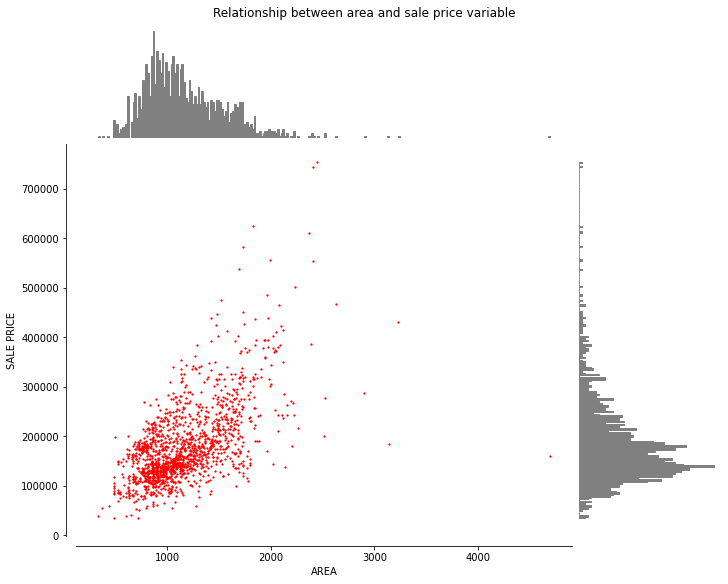

In [229]:
# Subplot Mosaic example 1 
layout = """A.;BC"""
axs = plt.figure(layout="constrained", figsize=(10,8)).subplot_mosaic(mosaic=layout, height_ratios=[1,3.5], width_ratios=[3.5,1])
axs['A'].hist(area, orientation="vertical", color="grey", ec="grey", bins=250)
axs['C'].hist(price, orientation="horizontal", color="grey", ec="grey", bins=250)
axs['B'].scatter(area,price, color="red", s=1.5)

axs['A'].axis("off")
axs['C'].axis("off")

axs['B'].spines["top"].set_visible(False)
axs['B'].spines["right"].set_visible(False)
axs['B'].get_xaxis().tick_bottom()
axs['B'].get_yaxis().tick_left()
axs['B'].spines["left"].set_position(("outward", 10))
axs['B'].spines["bottom"].set_position(("outward", 10))
axs['B'].set_xlabel("AREA")
axs['B'].set_ylabel("SALE PRICE")

plt.suptitle("Relationship between area and sale price variable", fontsize=12)

plt.show()

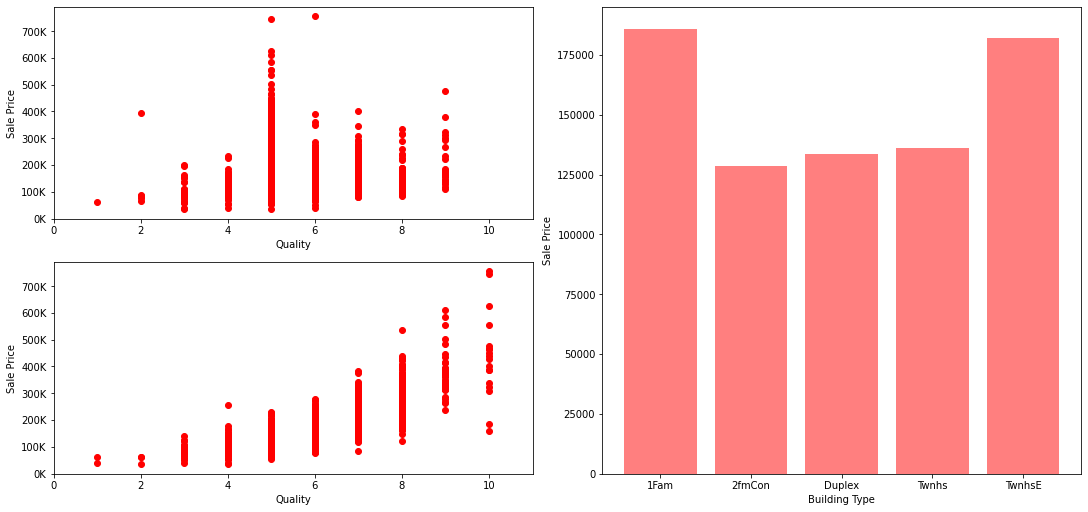

In [51]:
layout = [["hist_one", "main"], ["hist_two", "main"]]
build_type = df.groupby(['BldgType'], as_index=False).agg({'SalePrice': 'mean'})
fig = plt.figure(layout="constrained", figsize=(15,7))
axs = fig.subplot_mosaic(
    mosaic=layout,
    per_subplot_kw = {
        ("hist_one", "hist_two"): {"xlim": (0,11), "xticks": np.arange(0,12,2), "yticks": np.arange(0,800000,100000),
                                   'yticklabels': ["{:.0f}".format(y/1000) + "K" for y in range(0, 800000, 100000)],
                                   'xlabel': 'Quality', 'ylabel': 'Sale Price'},
        "main": {"xlabel": "Building Type", "ylabel": "Sale Price"}
    }
    )

axs["hist_one"].scatter(df.OverallCond, df.SalePrice, color='red')
axs["hist_two"].scatter(df.OverallQual, df.SalePrice, color='red')
axs["main"].bar(x=build_type.BldgType, height=build_type.SalePrice, color='red', alpha=0.5)




plt.show()

## Zoom